<a href="https://colab.research.google.com/github/Pratyusha-Satpathy/ecommerce-sales-analysis/blob/main/Ecommerce_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()  # choose the kaggle.json file you just downloaded


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bulbul16","key":"871ad7fdc43a4247a9ce03258be4f80a"}'}

In [ ]:
# 1) Install kaggle package
!pip install -q kaggle


In [ ]:
# 2) Make the .kaggle folder and move kaggle.json there (secure location)
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json   # secure permissions
!ls -la ~/.kaggle


total 16
drwxr-xr-x 2 root root 4096 Nov 11 06:40 .
drwx------ 1 root root 4096 Nov 11 06:40 ..
-rw------- 1 root root   64 Nov 11 07:00 kaggle.json


In [ ]:
# download dataset (replace slug if using a different dataset)
!kaggle datasets download -d vivek468/superstore-dataset-final


Dataset URL: https://www.kaggle.com/datasets/vivek468/superstore-dataset-final
License(s): other
superstore-dataset-final.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# unzip the downloaded file (adjust filename if different)
!unzip -q superstore-dataset-final.zip -d superstore_data
!ls -la superstore_data


replace superstore_data/Sample - Superstore.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: total 2244
drwxr-xr-x 2 root root    4096 Nov 11 06:40  .
drwxr-xr-x 1 root root    4096 Nov 11 07:00  ..
-rw-r--r-- 1 root root 2287806 Feb 17  2022 'Sample - Superstore.csv'


In [ ]:
!ls -R


.:
kaggle.json  sample_data  superstore_data  superstore-dataset-final.zip

./sample_data:
anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md

./superstore_data:
'Sample - Superstore.csv'


In [ ]:
import pandas as pd

df = pd.read_csv('superstore_data/Sample - Superstore.csv', encoding='latin1')
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:

df.info()


df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
# Remove duplicates
df.drop_duplicates(inplace=True)

# Fill missing numerical values (if any)
df.fillna(df.mean(numeric_only=True), inplace=True)

# Convert date columns to datetime (if not already)
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])


In [ ]:
# Extract year, month, and create an order-month column
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Order_Month'] = df['Order Date'].dt.to_period('M')

# Create a new feature for profit margin
df['Profit_Margin'] = df['Profit'] / (df['Sales'] + 1e-6)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['Sales','Profit','Discount']] = scaler.fit_transform(df[['Sales','Profit','Discount']])


            Row ID                     Order Date  \
count  9994.000000                           9994   
mean   4997.500000  2016-04-30 00:07:12.259355648   
min       1.000000            2014-01-03 00:00:00   
25%    2499.250000            2015-05-23 00:00:00   
50%    4997.500000            2016-06-26 00:00:00   
75%    7495.750000            2017-05-14 00:00:00   
max    9994.000000            2017-12-30 00:00:00   
std    2885.163629                            NaN   

                           Ship Date   Postal Code        Sales     Quantity  \
count                           9994   9994.000000  9994.000000  9994.000000   
mean   2016-05-03 23:06:58.571142912  55190.379428     0.010134     3.789574   
min              2014-01-07 00:00:00   1040.000000     0.000000     1.000000   
25%              2015-05-27 00:00:00  23223.000000     0.000744     2.000000   
50%              2016-06-29 00:00:00  56430.500000     0.002387     3.000000   
75%              2017-05-18 00:00:00  9000

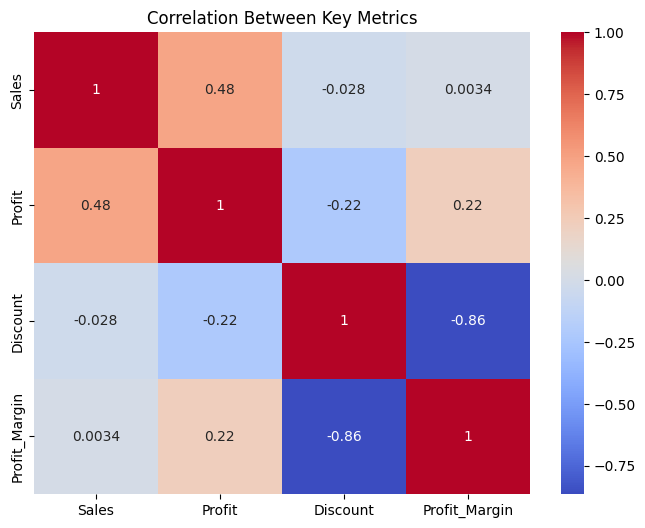

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Summary
print(df.describe())

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df[['Sales','Profit','Discount','Profit_Margin']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Key Metrics")
plt.show()


In [ ]:
import plotly.express as px

monthly_sales['Order_Month'] = monthly_sales['Order_Month'].astype(str)
fig = px.line(monthly_sales, x='Order_Month', y='Sales', title='📈 Monthly Sales Trend')
fig.show()



In [ ]:
fig = px.bar(df, x='Region', y='Profit', color='Category', barmode='group',
             title='💰 Profit by Region and Category')
fig.show()


In [ ]:
fig = px.scatter(df, x='Discount', y='Profit', color='Category', trendline='ols',
                 title='🧾 Discount Impact on Profit')
fig.show()


In [ ]:
top10 = (df.groupby('Sub-Category')['Profit']
         .sum()
         .sort_values(ascending=False)
         .head(10)
         .reset_index())

px.bar(top10, x='Sub-Category', y='Profit',
       title='🏆 Top 10 Most Profitable Sub-Categories').show()


In [ ]:
fig = px.box(df, x='Region', y='Profit', color='Region',
             title='📦 Profit Distribution Across Regions')
fig.show()


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) DejaVu Sans.



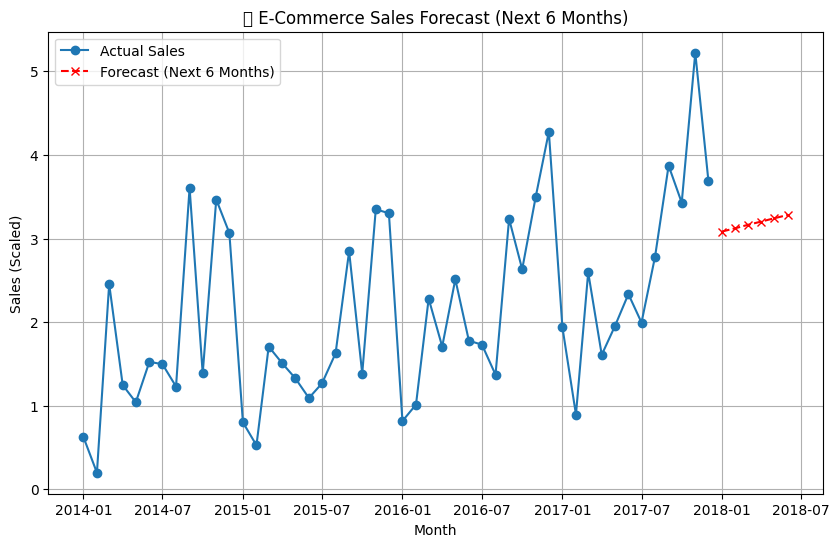

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# --- Step 1: Prepare monthly sales data ---
monthly_sales = df.groupby('Order_Month')['Sales'].sum().reset_index()

# Convert Order_Month (Period) to datetime for plotting
monthly_sales['Order_Month'] = monthly_sales['Order_Month'].astype(str)
monthly_sales['Order_Month'] = pd.to_datetime(monthly_sales['Order_Month'])

# Create numeric sequence for regression
monthly_sales['Month_Num'] = np.arange(len(monthly_sales))

# --- Step 2: Train linear regression model ---
X = monthly_sales[['Month_Num']]
y = monthly_sales['Sales']

model = LinearRegression()
model.fit(X, y)

# --- Step 3: Predict next 6 months ---
future_months = pd.date_range(
    start=monthly_sales['Order_Month'].max() + pd.offsets.MonthBegin(1),
    periods=6, freq='MS'
)
future_nums = np.arange(len(monthly_sales), len(monthly_sales) + 6)

future = pd.DataFrame({
    'Order_Month': future_months,
    'Month_Num': future_nums
})
future['Predicted_Sales'] = model.predict(future[['Month_Num']])

# --- Step 4: Plot ---
plt.figure(figsize=(10,6))
plt.plot(monthly_sales['Order_Month'], monthly_sales['Sales'], label='Actual Sales', marker='o')
plt.plot(future['Order_Month'], future['Predicted_Sales'], 'r--', label='Forecast (Next 6 Months)', marker='x')

plt.title("🔮 E-Commerce Sales Forecast (Next 6 Months)")
plt.xlabel("Month")
plt.ylabel("Sales (Scaled)")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# in Colab
df.to_csv('/content/SampleSuperstore_cleaned.csv', index=False)


In [ ]:
from google.colab import files
files.download('/content/SampleSuperstore_cleaned.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>